### Imports

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
#from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Importing Data

In [3]:
#df = pd.read_csv(r'D:\All_Docs\Masters\CS 584 Machine Learning\Project\Data\vehicles.csv', index_col=0)
df = pd.read_csv('vehicles.csv')

In [4]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [6]:
df = df.drop(columns=['Unnamed: 0','id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date'])df = df.drop(columns=['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date'])

In [10]:
df.describe()

,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


## Data Preprocessing

### Checking for Null values

In [11]:
for i in df.columns:
    if not df[i].isnull().values.any():
        print(i)

price


condition
cylinder
fuel
title

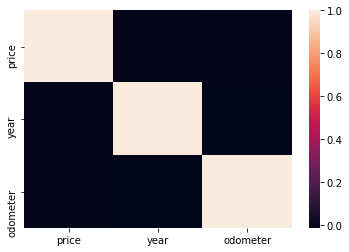

In [12]:
sns.heatmap(df.corr())
plt.show()

In [13]:
df = df.dropna(axis = 0, subset = ['year'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year'>

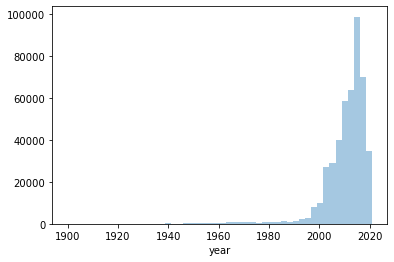

In [14]:
sns.distplot(df.year, kde = False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

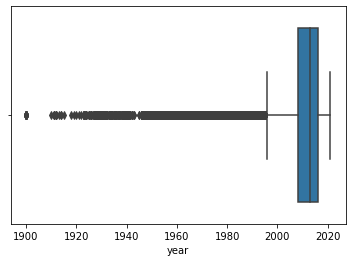

In [15]:
sns.boxplot(df.year)

In [24]:
df = df[(df.year > 1995)]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

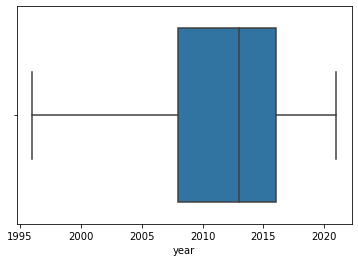

In [25]:
sns.boxplot(df.year)

In [26]:
df['manufacturer'].isna().sum()

14655

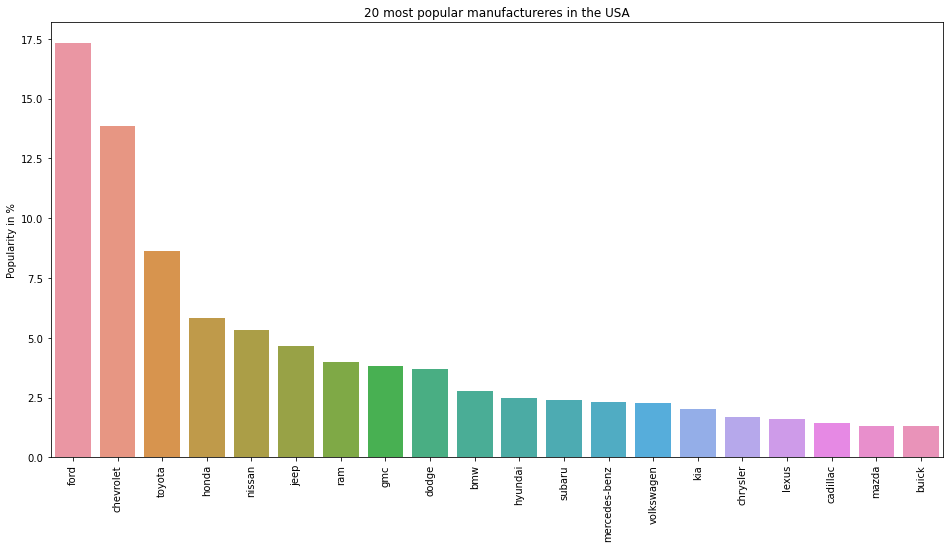

In [27]:
manufacturers = df["manufacturer"].value_counts().div(len(df)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [28]:
df['manufacturer'] = df['manufacturer'].fillna("unknown")

In [29]:
df['model'].isna().sum()

3752

In [30]:
df[df['model'] == '$$ CASH 4 JUNK CARS']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
349439,1500,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN
350064,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN
350159,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN


In [31]:
df['model'] = df['model'].replace(['$$ CASH 4 JUNK CARS'],'Junk Cars')

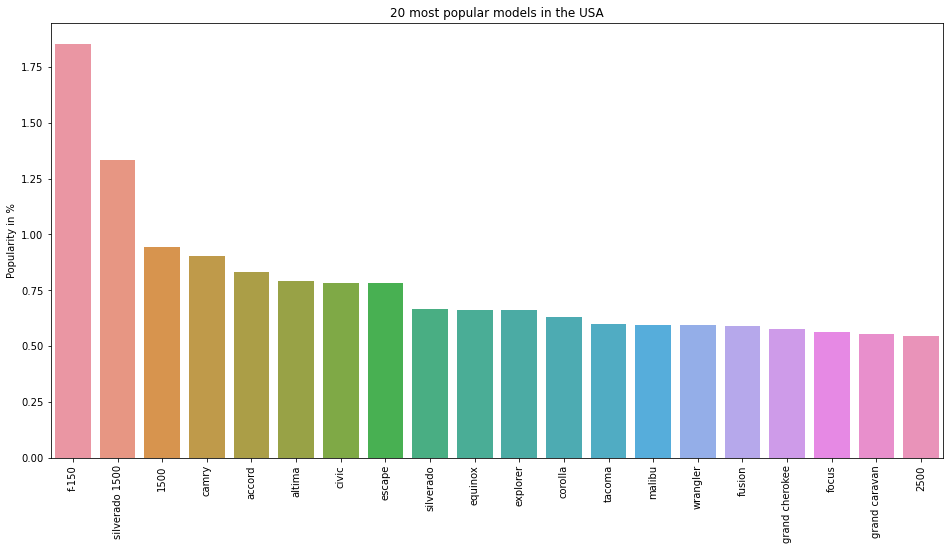

In [33]:
models = df["model"].value_counts().div(len(df)).mul(100)
models_TOP20 = models[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=models_TOP20.index, y=models_TOP20.values)
plt.title("20 most popular models in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [34]:
df['model'] = df['model'].fillna('unknown')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


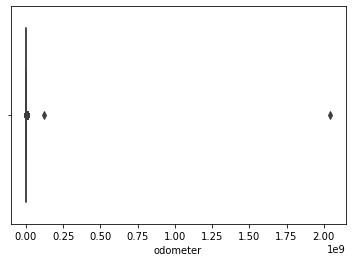

In [35]:
sns.boxplot(df['odometer'])
plt.show()

In [36]:
df = df[(df.odometer < 250000) & (df.odometer > 10)]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

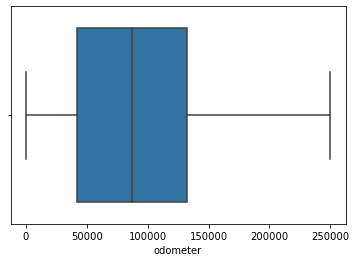

In [37]:
sns.boxplot(df['odometer'])

In [40]:
df[df["condition"]=="new"]["condition"]="like new"

<ipython-input-40-2bb97c607b0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["condition"]=="new"]["condition"]="like new"


In [41]:
odo_mean_excellent=df[df['condition'] == 'excellent']['odometer'].mean()
odo_mean_good=df[df['condition'] == 'good']['odometer'].mean()
odo_mean_salvage=df[df['condition'] == 'salvage']['odometer'].mean()
odo_mean_fair=df[df['condition'] == 'fair']['odometer'].mean()
odo_mean_like_new=df[df['condition'] == 'like new']['odometer'].mean()

In [43]:
df.loc[df['odometer'] <= odo_mean_like_new, 'condition'] = df.loc[df['odometer'] <= odo_mean_like_new, 'condition'].fillna('like new')

In [44]:
df.loc[df['odometer'] >= odo_mean_fair, 'condition'] = df.loc[df['odometer'] >= odo_mean_fair, 'condition'].fillna('fair')

In [45]:
df.loc[((df['odometer'] > odo_mean_like_new) & 
       (df['odometer'] <= odo_mean_excellent)), 'condition'] = df.loc[((df['odometer'] > odo_mean_like_new) & 
       (df['odometer'] <= odo_mean_excellent)), 'condition'].fillna('excellent')

In [46]:
df.loc[((df['odometer'] > odo_mean_excellent) & 
       (df['odometer'] <= odo_mean_good)), 'condition'] = df.loc[((df['odometer'] > odo_mean_excellent) & 
       (df['odometer'] <= odo_mean_good)), 'condition'].fillna('good')

In [47]:
df.loc[((df['odometer'] > odo_mean_good) & 
       (df['odometer'] <= odo_mean_fair)), 'condition'] = df.loc[((df['odometer'] > odo_mean_good) & 
       (df['odometer'] <= odo_mean_fair)), 'condition'].fillna('salvage')

In [52]:
df.cylinders.isna().sum()

128249

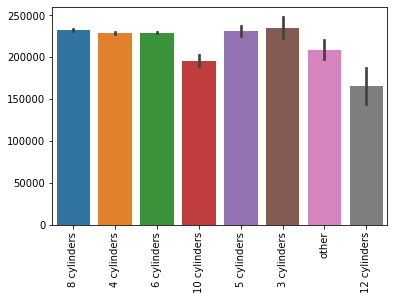

In [57]:
sns.barplot(y=df['cylinders'].index, x=df['cylinders'].values)
plt.show()

In [60]:
df['cylinders'].value_counts()

6 cylinders     94858
4 cylinders     85966
8 cylinders     68036
5 cylinders      1778
10 cylinders     1377
other             756
3 cylinders       426
12 cylinders      135
Name: cylinders, dtype: int64

In [66]:
df['cylinders']=df['cylinders'].fillna(df['cylinders'].mode()[0])

In [67]:
df['cylinders'].isna().sum()

0

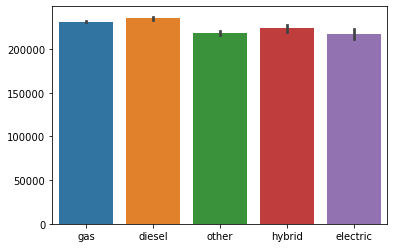

In [70]:
sns.barplot(y=df['fuel'].index, x=df['fuel'].values)
plt.show()

In [71]:
df.fuel.isna().sum()

2172

In [73]:
df['fuel']=df['fuel'].fillna(df['fuel'].mode()[0])

In [74]:
df.fuel.isna().sum()

0

In [78]:
df['title_status'].isna().sum()

1582

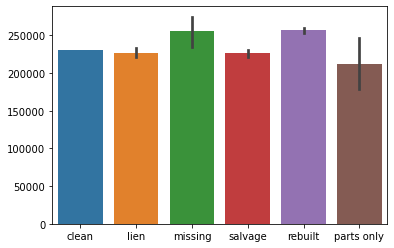

In [79]:
sns.barplot(y=df['title_status'].index, x=df['title_status'].values)
plt.show()

In [90]:
df['title_status']=df['title_status'].fillna(df['title_status'].mode()[0])

In [91]:
df.title_status.isna().sum()

0